# Julia Basics

This document is derived from [JuliaBox's tutorial](https://github.com/JuliaComputing/JuliaBoxTutorials/tree/master/introductory-tutorials/intro-to-julia).

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

The Jupyter Notebook can mix code, multimedia results, headings, documentation, equations like $\sqrt{\int x^2 dx}$, and even interactive widgets.

Julia documentation https://docs.julialang.org/en/stable/ is a very useful reference.

In the Jupyter Notebook Enter the command mode by Esc. Use `Esc+h` for help.   One useful command is `Esc+l`, which toggles the **line number**.

In this class, everyone who chooses to use Julia **MUST use Julia v1.2.0**

**Last revision**: 8/28/2019

In [1]:
A = rand(10,300)

10×300 Array{Float64,2}:
 0.427034   0.513345   0.0893179   …  0.166944  0.674932  0.372988  
 0.919618   0.807751   0.891436       0.611383  0.840811  0.667656  
 0.0584967  0.205334   0.00650537     0.72081   0.241391  0.889707  
 0.379143   0.252802   0.212042       0.622986  0.221688  0.00810745
 0.618515   0.323492   0.143382       0.268141  0.328737  0.455452  
 0.261307   0.634351   0.95617     …  0.789382  0.656201  0.0937593 
 0.715884   0.0340277  0.234191       0.50002   0.731584  0.442349  
 0.337074   0.992807   0.871655       0.44354   0.580269  0.280511  
 0.167657   0.570046   0.948635       0.53887   0.388081  0.822012  
 0.433939   0.614263   0.318542       0.774148  0.223748  0.405055  

It has all of the usual built-in Matlab/Numpy-like linear-algebra and vector functions:

In [2]:
# Basic linear algebra routines are in the LinearAlgebra package (no need to install separately)
using LinearAlgebra


b = rand(10) # a random rank-10 vector
x = A \ b    # solve for x satisfying A*x = b; has rank 300
B = A' * A   # A-transpose multiplied by A; is a 300x300 symmetrix matrix with real eigenvalues
eB = eigvals(B)

300-element Array{Float64,1}:
  -6.161307854994299e-13 
  -2.570675561455794e-13 
  -2.296395674452376e-13 
  -1.7356428311537126e-13
  -1.646654833718438e-13 
  -9.366962308128613e-14 
  -8.719234334816874e-14 
  -7.293636575067982e-14 
  -6.253486742891387e-14 
  -4.253047376707419e-14 
  -3.987993411676791e-14 
  -3.3011544345668836e-14
  -2.67773871165104e-14  
   ⋮                     
   2.7830500822557004e-13
   3.7605210013823256e-13
  18.057245423835504     
  21.818210565144604     
  22.349202767191283     
  24.37190663150102      
  24.594197974856346     
  25.485702258199662     
  25.69232781669542      
  29.365590591355918     
  32.226893928226076     
 801.0751547791017       

It also supports convenient vectorisation of functions using the `.` operator:

In [3]:
#]add SpecialFunctions
using SpecialFunctions

println(size(x))

# @. is a macro that vectorizes the line
# equivalent to adding vectorization to each operation
# eB .- 2x.^2 .+ 4x .- 6

@. eB - 2x^2 + 4x - 6

(300,)


300-element Array{Float64,1}:
  -5.974751254101113 
  -6.035480445760073 
  -5.976743258960454 
  -6.054394806435125 
  -5.9433186409021435
  -5.973182699230564 
  -5.920957351353685 
  -6.0007330759618025
  -5.897122296680795 
  -6.0293686527581025
  -5.975368628488125 
  -6.083670253059399 
  -5.96947509056758  
   ⋮                 
  -5.9892570866352175
  -6.0149845841460685
  12.036305695815063 
  15.856475817767091 
  16.370944456610196 
  18.398787010387448 
  18.623219589719717 
  19.477705801138978 
  19.770274185653854 
  23.434406503250624 
  26.210124614499023 
 795.1214435990992   

Complex numbers and arbitrary-precision arithmetic (via MPFR) are available, of course.

In [4]:
cos(big(3 + 4im))

-27.03494560307422464769480266827091348467753695567661661019265514673434246483996 - 3.851153334811777536563337123053124569704160846091637003157728595256494186490506im

## Unicode

All strings are UTF-8 encoded Unicode by default (UTF-16 and UTF-32 also supported):

In [5]:
# regex search of a Unicode string
# This replaces the old matchall function
collect((m.match for m = eachmatch(r"\s[a-z]+", "α is a Grëék letter"))) 

3-element Array{SubString{String},1}:
 " is"    
 " a"     
 " letter"

Like Python 3, variable names can be Unicode, but Julia allows a somewhat wider range of codepoints in identifiers, which can be typed by LaTeX-like tab-completion *\hat[TAB]\alpha[TAB]*.

In [6]:
α̂= 7
ħ = 6.62606957e-34 / 2π
ẋ = ħ *α̂

7.3820020773540256e-34

Unlike Python 3, Unicode math operators are parsed as infix operators, which are available for user-defined meanings:

In [7]:
≪(x,y) = x < 0.1*y
50 ≪ 100, 5 ≪ 100, 5 ≤ 50

(false, true, true)

In [8]:
const ⊗ = kron

# Note that eye(N,N) is deprecated for representing the identity matrix

Matrix(I,2,2) ⊗ rand(2,2)

4×4 Array{Float64,2}:
 0.111027  0.567336  0.0       0.0     
 0.693839  0.867448  0.0       0.0     
 0.0       0.0       0.111027  0.567336
 0.0       0.0       0.693839  0.867448

## Functions and JIT-compilation

Functions can be defined in several ways, and *don't require type-declarations*.

In [9]:
# verbose form:
function foo(x)
    return x + 1
end

# one-line form:
foobar(x) = x + 2

# anonymous function
x -> x + 3

#5 (generic function with 1 method)

In [10]:
foo(3) # compiles foo for Int arguments

4

In [11]:
foo(7) # re-uses compiled foo(Int)

8

In [12]:
foo(7.3) # compiles a different version for Float64 arguments

8.3

In [13]:
# Use vectorization

@. foo([1,2,7,9]) 

4-element Array{Int64,1}:
  2
  3
  8
 10

# Plotting in Julia

We will use the PyPlot package to plot with Julia. This notebook has a few examples to get you started. The [PyPlot.jl](https://github.com/stevengj/PyPlot.jl) site has excellent documentation for plotting.

Loading the PyPlot module may take a few seconds.

In general, all of the arguments, including keyword arguments, are exactly the same as in Python. (With minor translations, of course, e.g. Julia uses `true` and `nothing` instead of Python's `True` and `None`.)

The full matplotlib.pyplot API is far too extensive to describe here; see the [matplotlib.pyplot documentation](http://matplotlib.org/api/pyplot_api.html) for more information. The Matplotlib version number is returned by PyPlot.version.


In [14]:
#]add PyPlot
using PyPlot

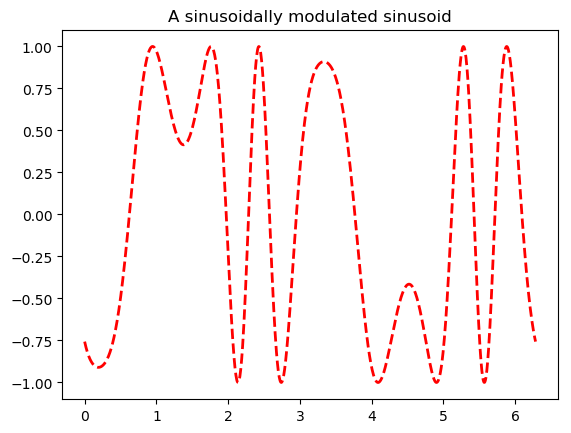

PyObject Text(0.5, 1.0, 'A sinusoidally modulated sinusoid')

In [15]:
# range plays the role of linspace starting from v0.7.0

x = range(0,stop=2*pi,length=1000)
y = similar(x)
@. y = sin(3*x + 4*cos(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

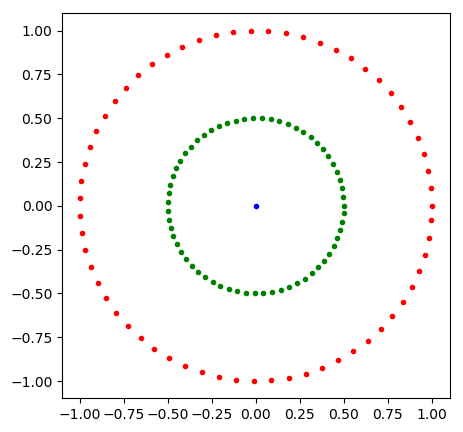

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003683DA20>

In [16]:
# Draw (x, y) points
figure(figsize=(5, 5))
θ = collect(0:0.1:2π)
plot(0,0,"b.")
plot(cos.(θ), sin.(θ), "r.")
plot(0.5cos.(θ), 0.5sin.(θ), "g.")

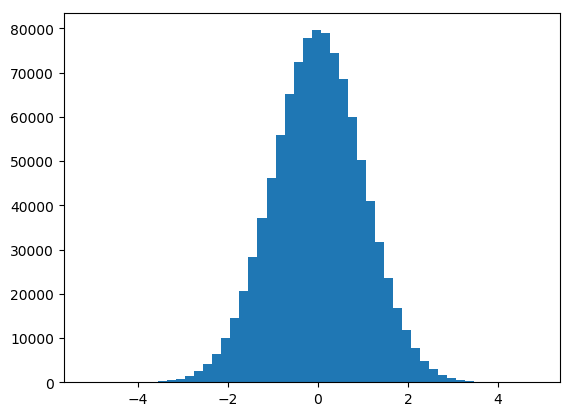

In [17]:
# Draw a histogram

y = randn(10^6)
hist(y, 50);    

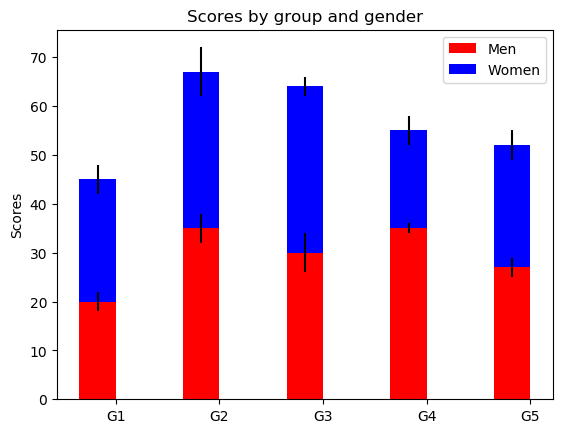

PyObject <matplotlib.legend.Legend object at 0x0000000037FF15F8>

In [18]:
# Draw a stacked bar chart

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = 1:N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = PyPlot.bar(ind, menMeans, width, color="r", yerr=menStd)
p2 = PyPlot.bar(ind, womenMeans, width, bottom=menMeans, color="b", yerr=womenStd)

ylabel("Scores")
title("Scores by group and gender")
xticks(ind .+ width/2., ("G1", "G2", "G3", "G4", "G5") )
legend( (p1[1], p2[1]), ("Men", "Women") )


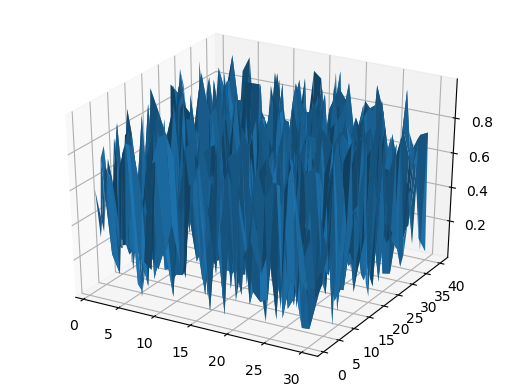

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000000183AE48>

In [19]:
# Plot a random surface

surf(rand(30,40))